In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

In [76]:
import pandas as pd
data= pd.read_csv("sampled_df.csv")
data

title  year  \
0      The SpongeBob Movie: Sponge Out of Water  2015   
1                                     Entourage  2015   
2                                      Baywatch  2017   
3                                          Mute  2018   
4                                     Honeymoon  2014   
...                                         ...   ...   
19995                                     Stree  2018   
19996                                   Creep 2  2017   
19997                             Hacksaw Ridge  2016   
19998                          Ready Player One  2018   
19999                     The Hangover Part III  2013   

                                    director  \
0      Directors:Paul Tibbitt, Mike Mitchell   
1                                 Doug Ellin   
2                                Seth Gordon   
3                               Duncan Jones   
4                               Leigh Janiak   
...                                      ...   
19995                           Amar Kaushik   
19996                          Patrick Brice   
19997                             Mel Gibson   
19998                       Steven Spielberg   
19999                          Todd Phillips   

                                                  actors  rating runtime  \
0      Tom Kenny, Antonio Banderas, Bill Fagerbakke, ...     6.0      92   
1      Adrian Grenier, Kevin Connolly, Jerry Ferrara,...     6.5     104   
2      Dwayne Johnson, Zac Efron, Alexandra Daddario,...     5.5     116   
3      Alexander Skarsgård, Paul Rudd, Justin Theroux...     5.4     126   
4      Rose Leslie, Harry Treadaway, Ben Huber, Hanna...     5.7      87   
...                                                  ...     ...     ...   
19995  Ashish Chhipa, Rajkummar Rao, Shraddha Kapoor,...     7.5     128   
19996  Karan Soni, Mark Duplass, Desiree Akhavan, Kyl...     6.4      78   
19997  Andrew Garfield, Sam Worthington, Luke Bracey,...     8.1     139   
19998  Tye Sheridan, Olivia Cooke, Ben Mendelsohn, Le...     7.4     140   
19999  Bradley Cooper, Zach Galifianakis, Ed Helms, J...     5.8     100   

           genre release_date  \
0      Animation     2/6/2015   
1         Comedy    7/18/2015   
2         Action    5/25/2017   
3        Mystery    2/23/2018   
4          Drama    9/12/2014   
...          ...          ...   
19995     Comedy    8/31/2018   
19996      Crime   10/24/2017   
19997  Biography    11/4/2016   
19998     Action    3/29/2018   
19999     Comedy    5/23/2013   

                                            plot_summary  \
0      When a diabolical pirate above the sea steals ...   
1      Film star Vince Chase navigates the vapid terr...   
2      Devoted lifeguard Mitch Buchannon butts heads ...   
3      A mute bartender goes up against his city's ga...   
4      A newlywed couple finds their lake-country hon...   
...                                                  ...   
19995  In the small town of Chanderi, the menfolk liv...   
19996  A video artist looking for work drives to a re...   
19997  World War II American Army Medic Desmond T. Do...   
19998  When the creator of a virtual reality called t...   
19999  When one of their own is kidnapped by an angry...   

                                            words_movies  \
0      diabolical pirate sea steals secret formula ne...   
1      navigates vapid terrain close circle friends t...   
2      Devoted lifeguard butts heads brash new recrui...   
3      mute bartender goes city gangsters effort find...   
4      newlywed couple finds lake country honeymoon d...   
...                                                  ...   
19995  small town menfolk live fear evil spirit named...   
19996  video artist looking work drives remote house ...   
19997  served refuses kill people becomes first man A...   
19998  creator virtual reality called dies makes post...   
19999  own kidnapped angry gangster track escaped pri...   

                            

In [55]:
import pandas as pd

# Convert the 'release_date' column to a datetime object
data['release_date'] = pd.to_datetime(data['release_date'], format='%m/%d/%Y')

# Extract the month and create a new 'month' column in words
data['month'] = data['release_date'].dt.strftime('%B')

# Display the DataFrame with the new 'month' column in words
print(data[['release_date', 'month']])

      release_date      month
0       2015-02-06   February
1       2015-07-18       July
2       2017-05-25        May
3       2018-02-23   February
4       2014-09-12  September
...            ...        ...
19995   2018-08-31     August
19996   2017-10-24    October
19997   2016-11-04   November
19998   2018-03-29      March
19999   2013-05-23        May

[20000 rows x 2 columns]


In [56]:
df = data.head(200)

In [45]:
df

title  year  \
0    The SpongeBob Movie: Sponge Out of Water  2015   
1                                   Entourage  2015   
2                                    Baywatch  2017   
3                                        Mute  2018   
4                                   Honeymoon  2014   
..                                        ...   ...   
195                                Zombeavers  2014   
196                                  45 Years  2015   
197                   Star Trek Into Darkness  2013   
198                  Wrong Turn 5: Bloodlines  2012   
199                          English Vinglish  2012   

                                  director  \
0    Directors:Paul Tibbitt, Mike Mitchell   
1                               Doug Ellin   
2                              Seth Gordon   
3                             Duncan Jones   
4                             Leigh Janiak   
..                                     ...   
195                           Jordan Rubin   
196                           Andrew Haigh   
197                            J.J. Abrams   
198                         Declan O'Brien   
199                           Gauri Shinde   

                                                actors  rating runtime  \
0    Tom Kenny, Antonio Banderas, Bill Fagerbakke, ...     6.0      92   
1    Adrian Grenier, Kevin Connolly, Jerry Ferrara,...     6.5     104   
2    Dwayne Johnson, Zac Efron, Alexandra Daddario,...     5.5     116   
3    Alexander Skarsgård, Paul Rudd, Justin Theroux...     5.4     126   
4    Rose Leslie, Harry Treadaway, Ben Huber, Hanna...     5.7      87   
..                                                 ...     ...     ...   
195           Rachel Melvin, Cortney Palm, Lexi Atkins     4.9  77 min   
196  Charlotte Rampling, Tom Courtenay, Geraldine J...     7.1      95   
197  Chris Pine, Zachary Quinto, Zoe Saldana, Bened...     7.7     132   
198  Doug Bradley, Camilla Arfwedson, Simon Ginty, ...     5.4  91 min   
199   Sridevi, Adil Hussain, Mehdi Nebbou, Priya Anand     7.8     134   

                      genre release_date  \
0                 Animation   2015-02-06   
1                    Comedy   2015-07-18   
2                    Action   2017-05-25   
3                   Mystery   2018-02-23   
4                     Drama   2014-09-12   
..                      ...          ...   
195  Horror, Action, Comedy   2015-03-20   
196                   Drama   2015-08-28   
197                  Action   2013-05-16   
198        Horror, Thriller   2013-02-22   
199                  Comedy   2012-10-05   

                                          plot_summary  \
0    When a diabolical pirate above the sea steals ...   
1    Film star Vince Chase navigates the vapid terr...   
2    Devoted lifeguard Mitch Buchannon butts heads ...   
3    A mute bartender goes up against his city's ga...   
4    A newlywed couple finds their lake-country hon...   
..                                                 ...   
195  A fun weekend turns into madness and horror fo...   
196  A married couple preparing to celebrate their ...   
197  After the crew of the Enterprise find an unsto...   
198  A group of college students, on a trip to the ...   
199  A quiet, sweet tempered housewife endures smal...   

                                          words_movies  \
0    diabolical pirate sea steals secret formula ne...   
1    navigates vapid terrain close circle friends t...   
2    Devoted lifeguard butts heads brash new recrui...   
3    mute bartender goes city gangsters effort find...   
4    newlywed couple finds lake country honeymoon d...   
..                                                 ...   
195  fun weekend turns madness horror bunch groupie...   
196  married couple preparing celebrate wedding ann...   
197  crew Enterprise find unstoppable force terror ...   
198  group college students trip encounter clan can...   
199  quiet sweet tempered housewife endures small s...   

              

In [6]:
!pip install tensorflow

In [9]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [22]:
df = df.dropna()

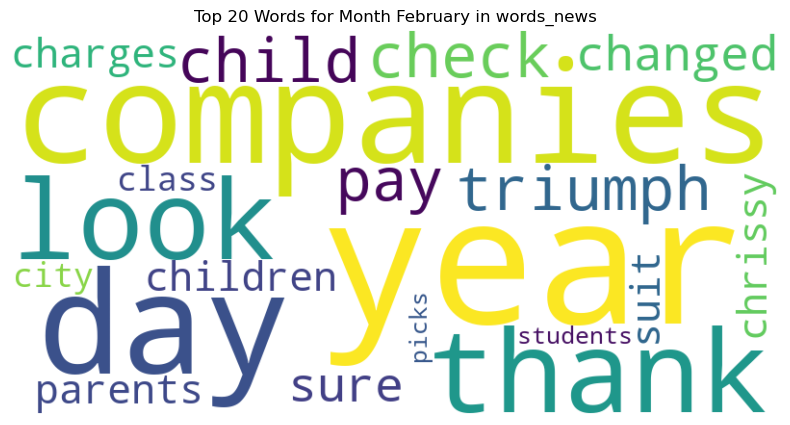

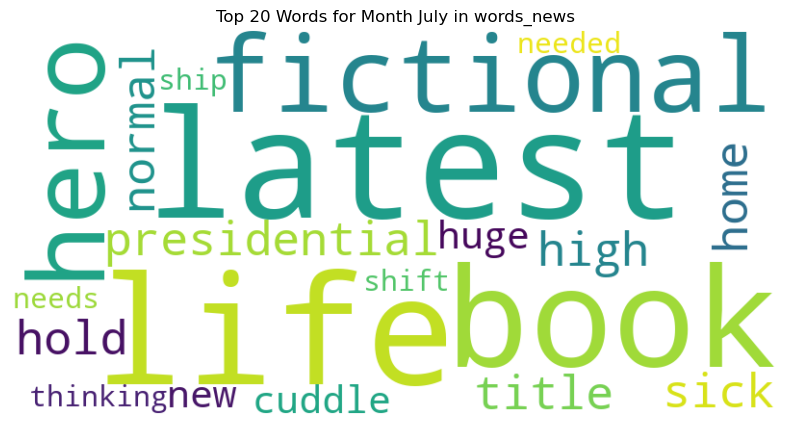

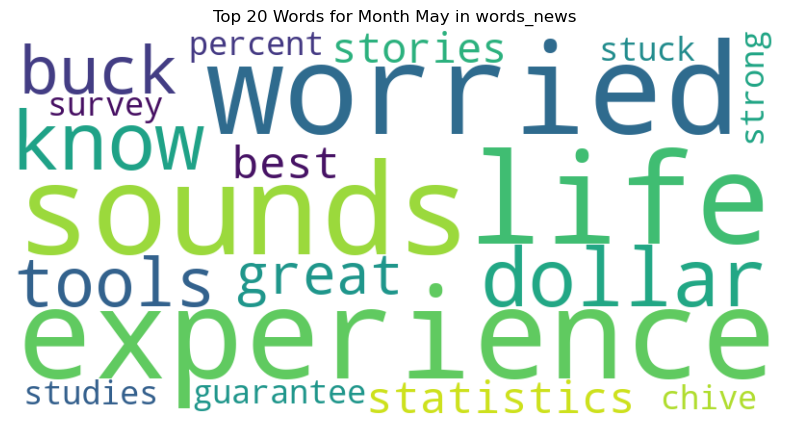

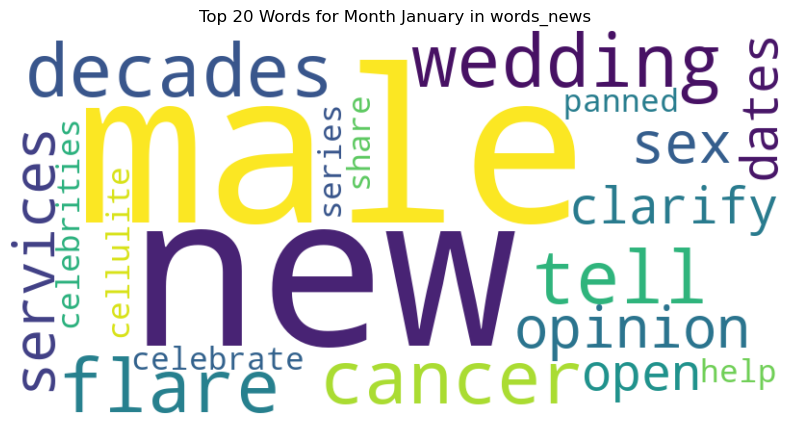

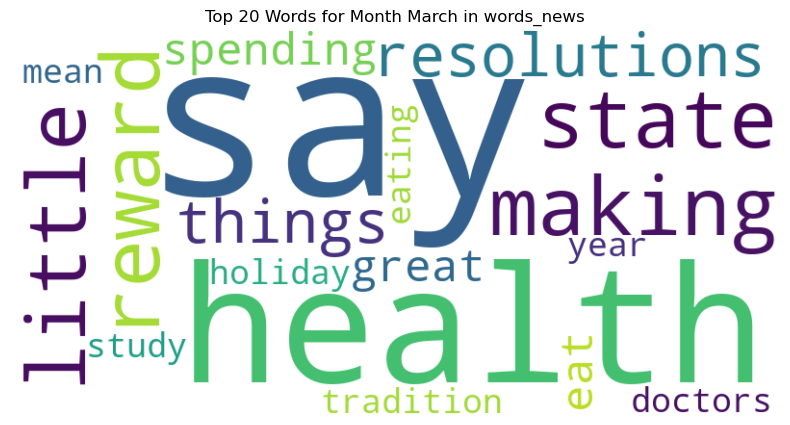

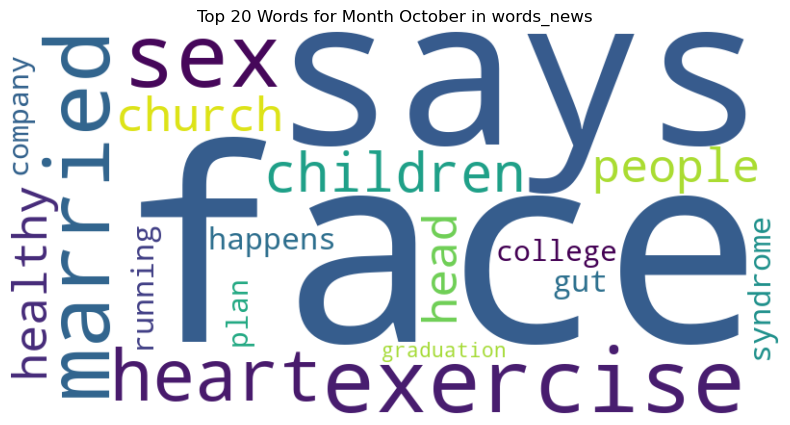

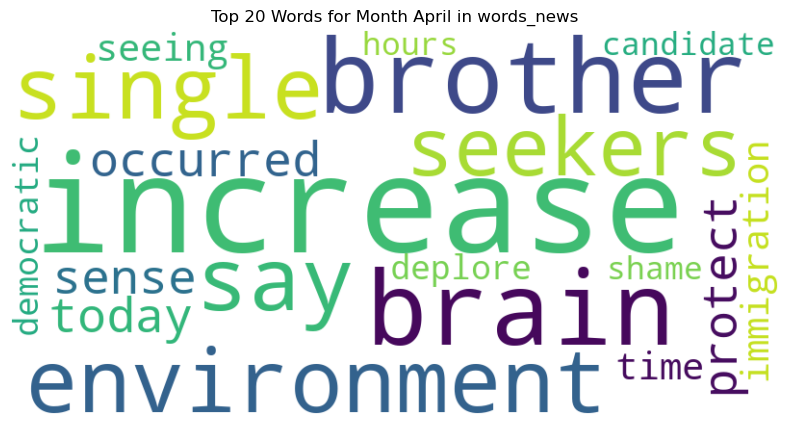

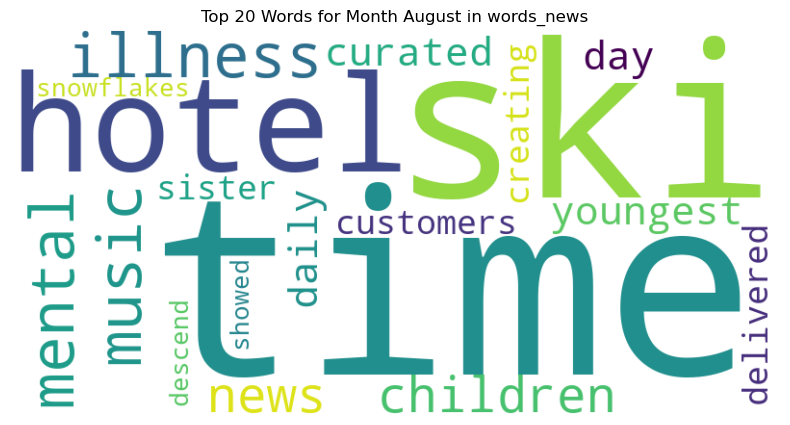

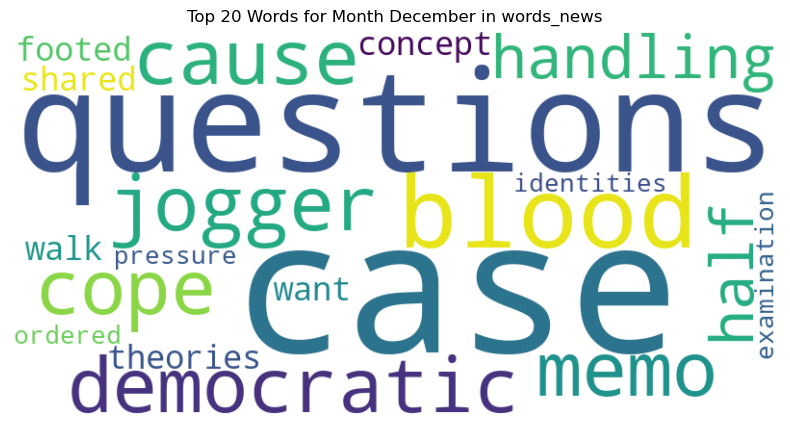

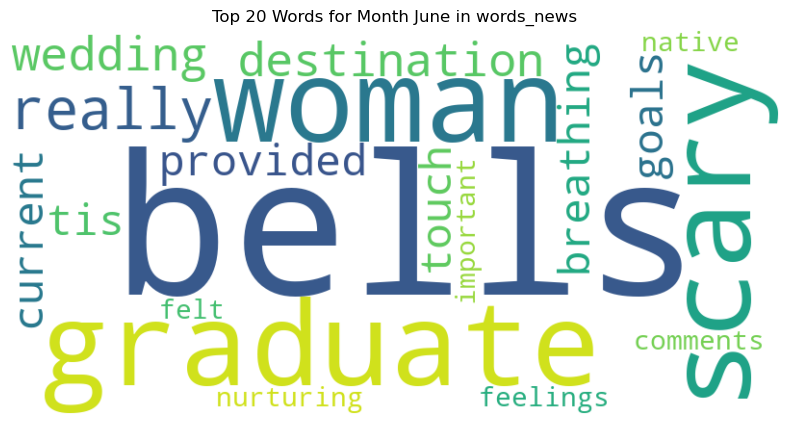

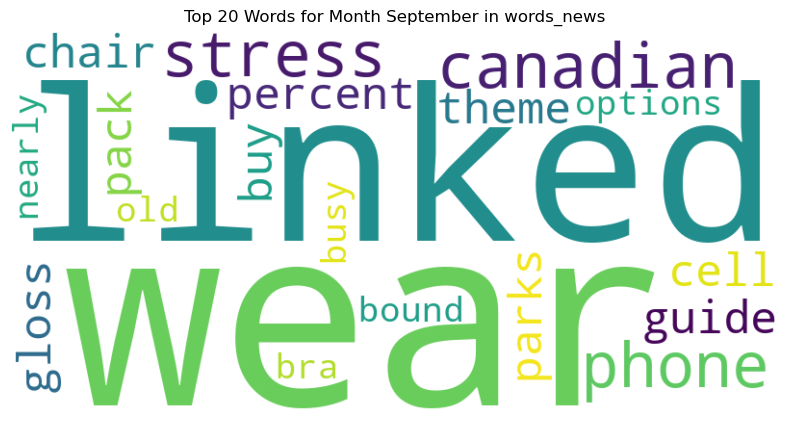

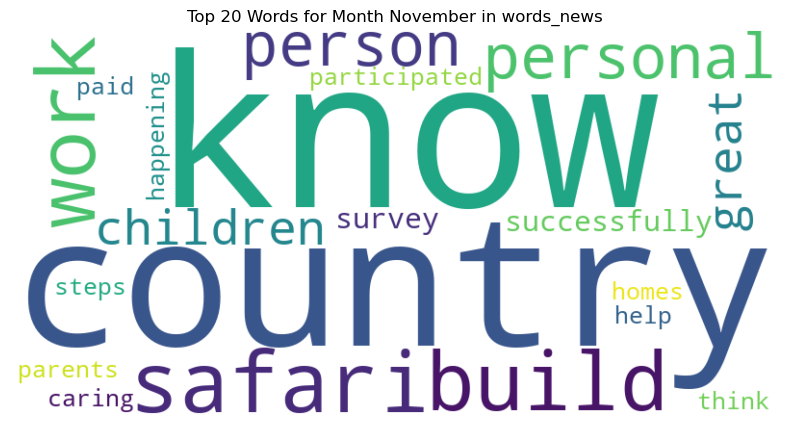

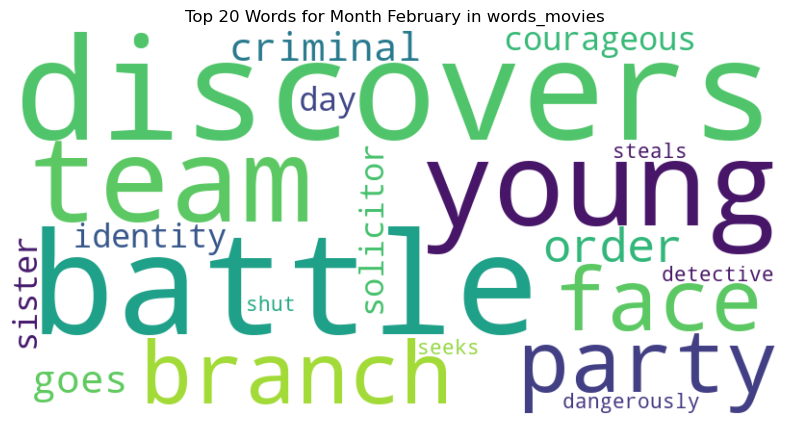

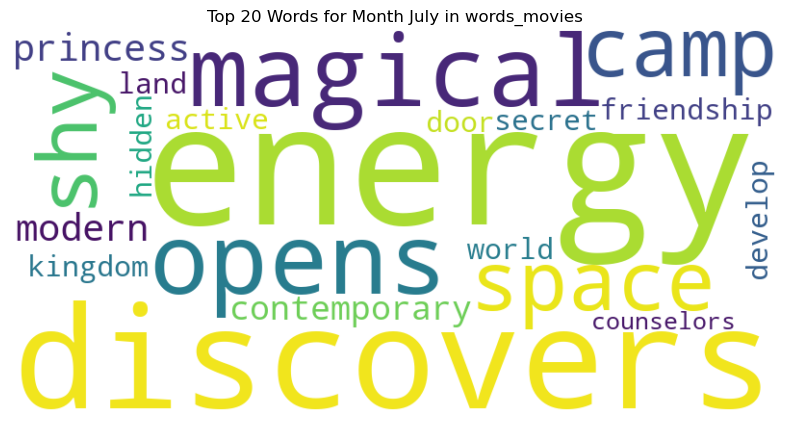

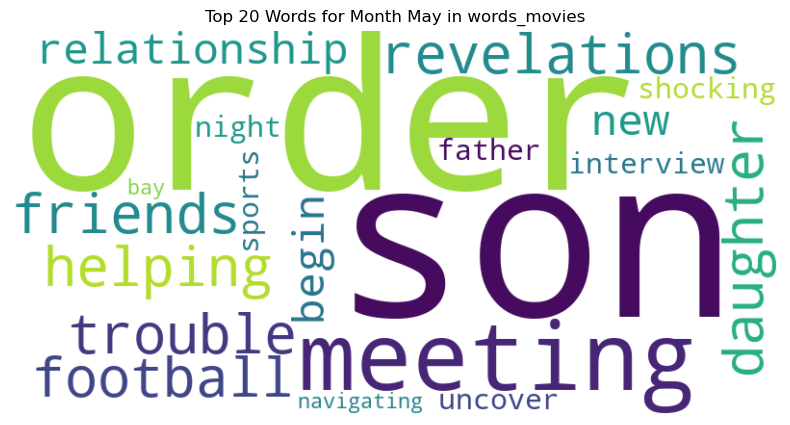

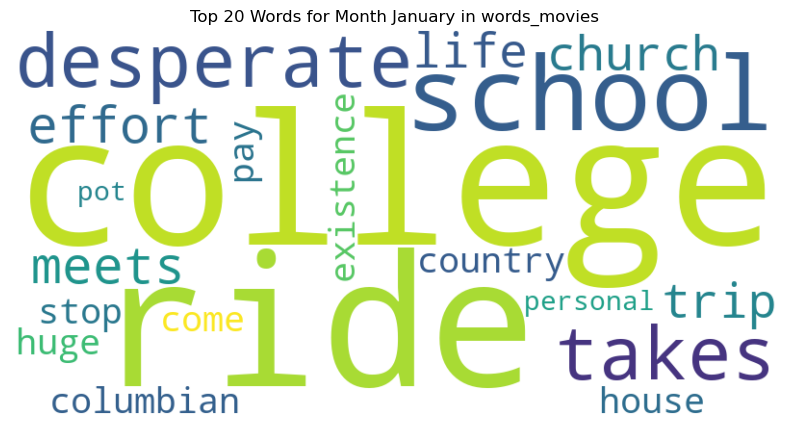

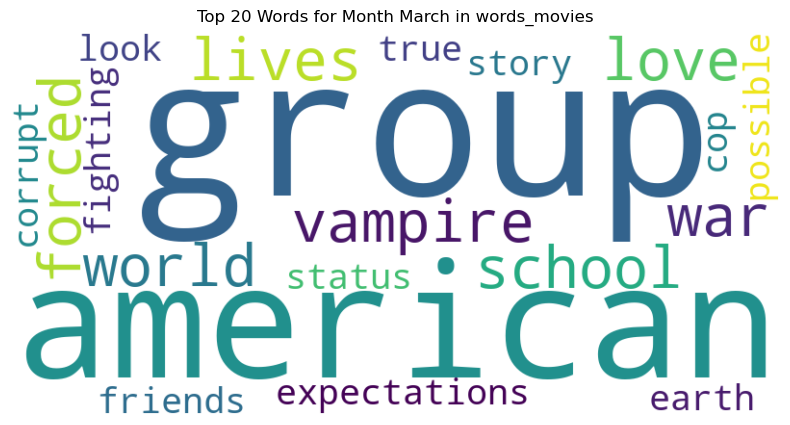

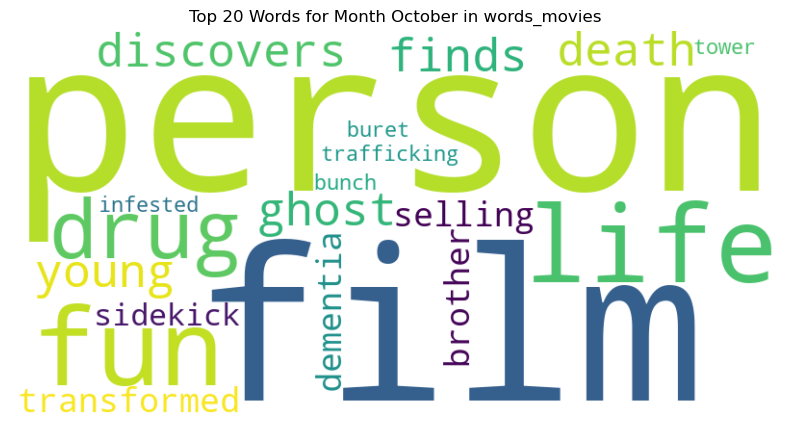

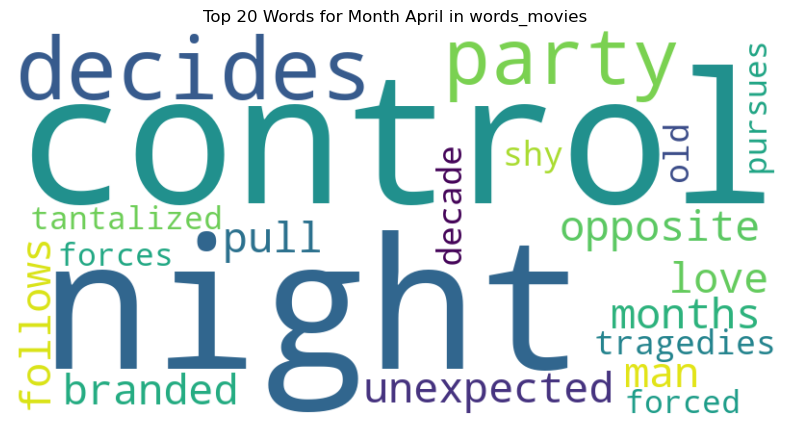

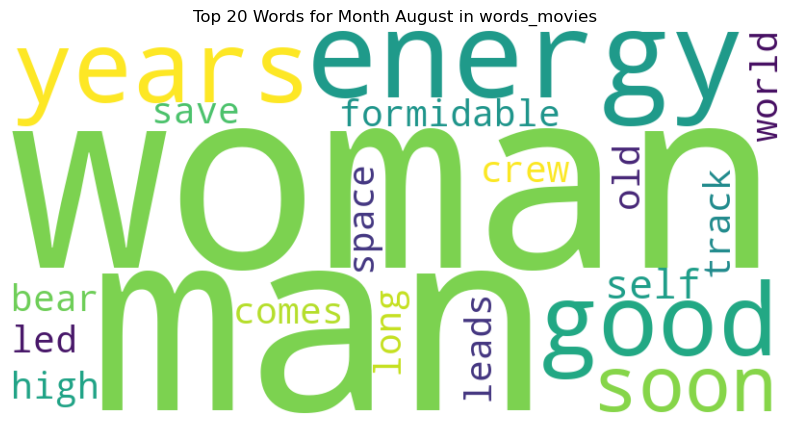

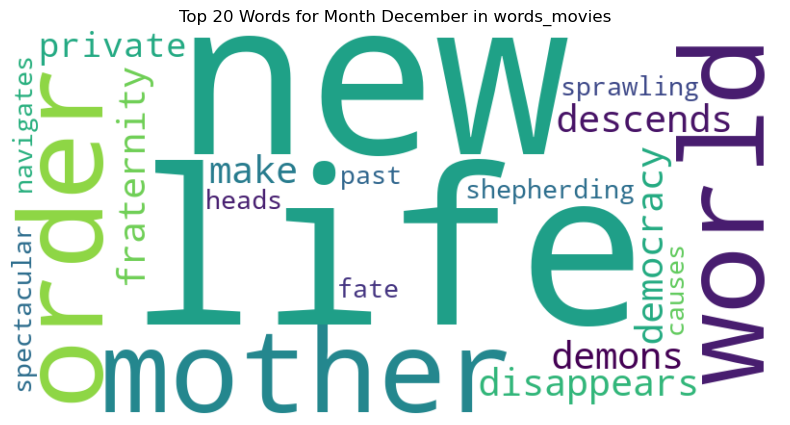

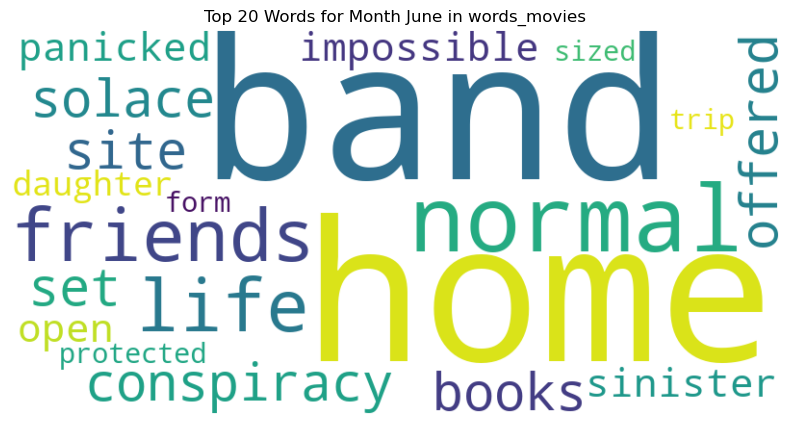

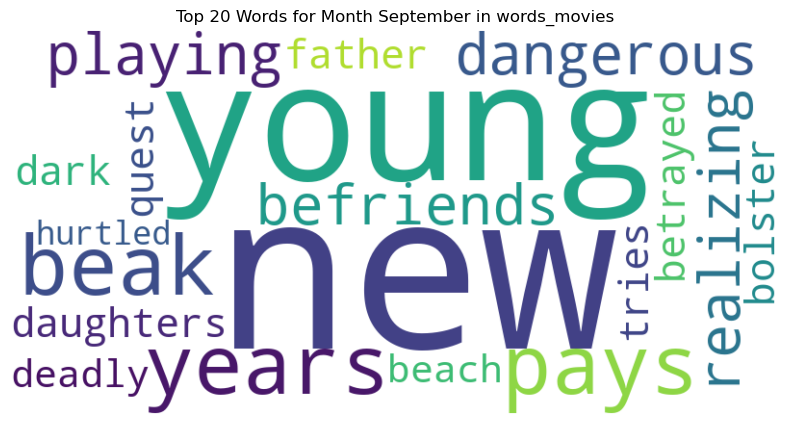

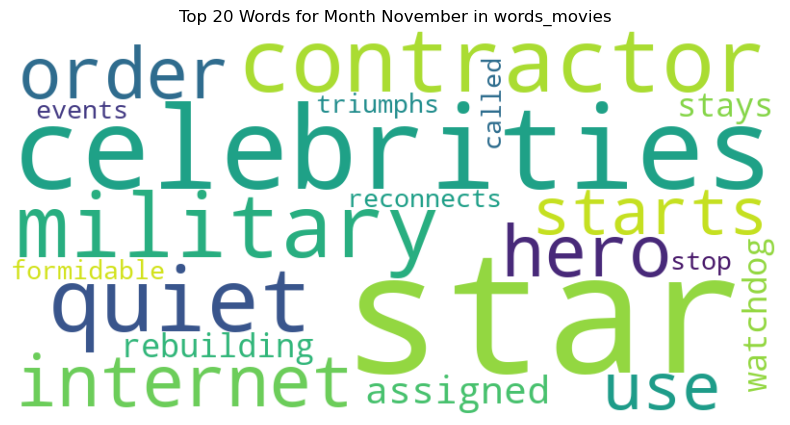

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming top_words_per_month_news and top_words_per_month_movies are already defined

# Function to generate and display word cloud
def generate_wordcloud(top_words_per_month, column_name):
    for month, top_words in top_words_per_month.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Top 20 Words for Month {month} in {column_name}")
        plt.axis('off')
        plt.show()

# Generate and display word clouds for 'words_news'
generate_wordcloud(top_words_per_month_news, 'words_news')

# Generate and display word clouds for 'words_movies'
generate_wordcloud(top_words_per_month_movies, 'words_movies')


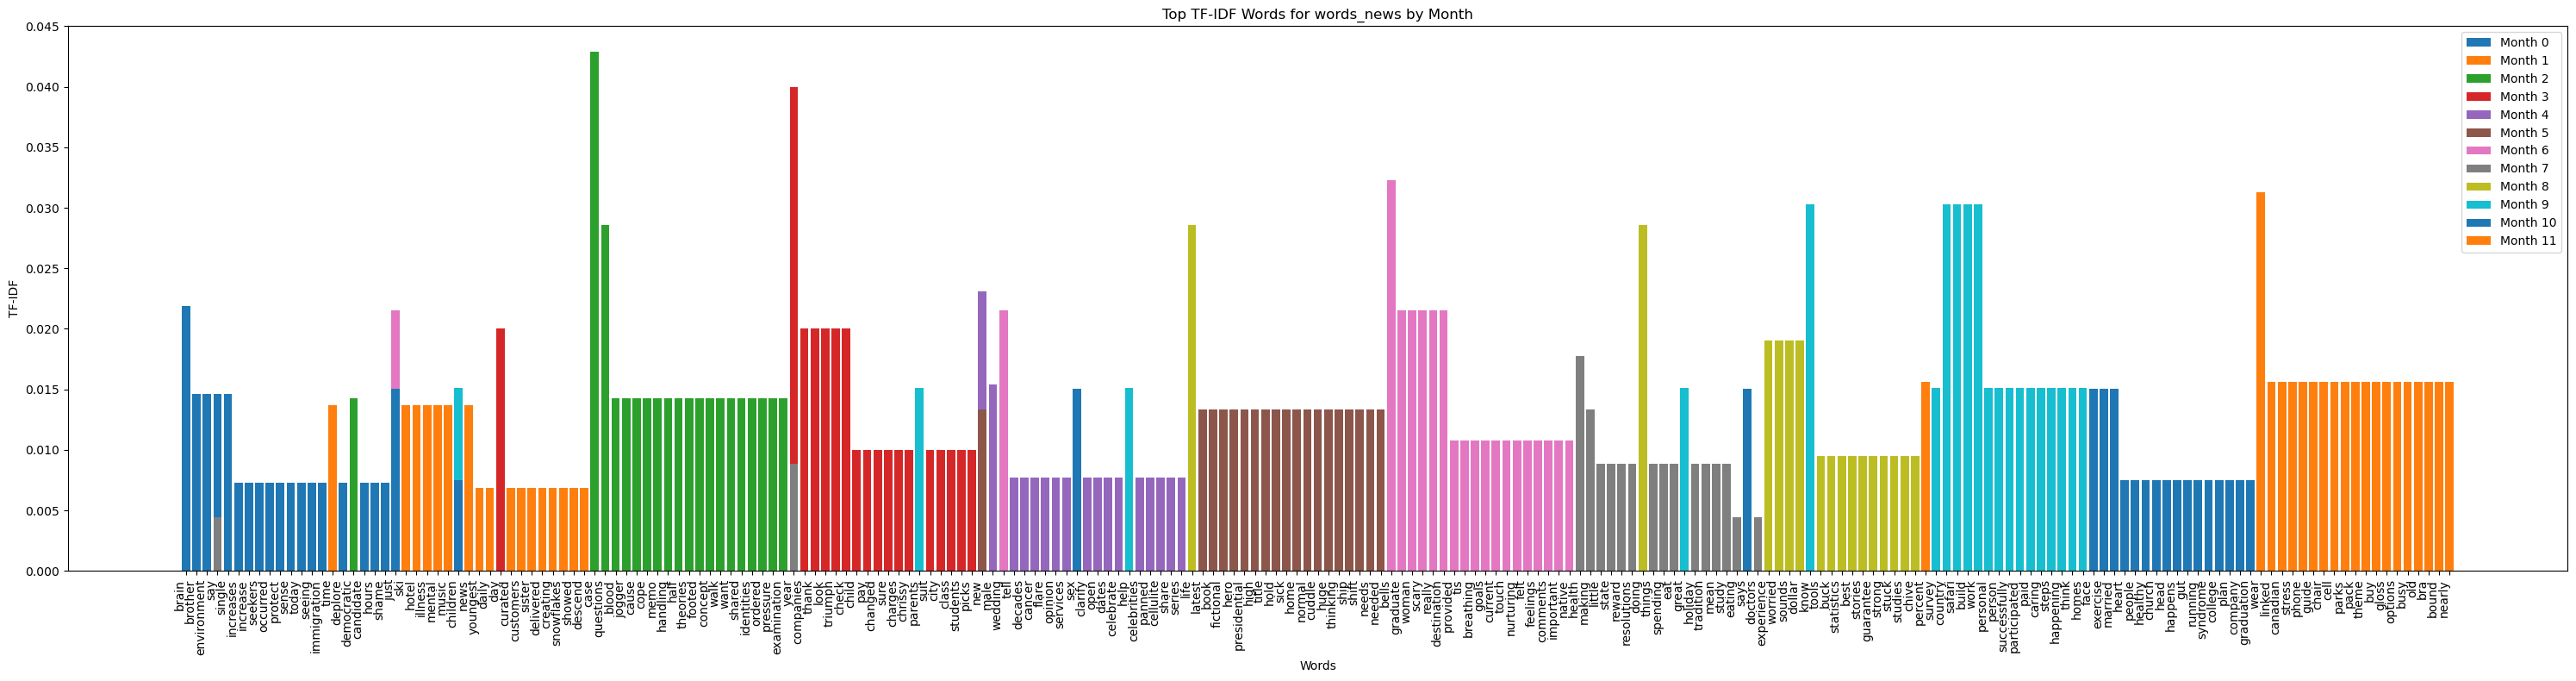

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'words_news' and 'month' columns

# Tokenize and count words for 'words_news'
vectorizer = CountVectorizer(stop_words='english')
X_words_news = vectorizer.fit_transform(df['words_news'])
word_counts_news = pd.DataFrame(X_words_news.toarray(), columns=vectorizer.get_feature_names_out())
word_counts_news['month'] = df['month']  # Assuming 'month' is already present

# Aggregate counts on a monthly basis
monthly_word_counts_news = word_counts_news.groupby('month').sum()

# Identify seasonal words using TF-IDF
# You can adjust this based on your specific requirements and analysis goals
tfidf_news = (monthly_word_counts_news.T / monthly_word_counts_news.sum(axis=1)).T

# Identify the top TF-IDF words for each month
top_tfidf_words_per_month_news = {}
for month in tfidf_news.index:
    top_tfidf_words_per_month_news[month] = tfidf_news.loc[month].sort_values(ascending=False).index[:20]

# Convert month names to numerical values
month_numeric = {month: i for i, month in enumerate(tfidf_news.index)}

# Visualize the monthly TF-IDF values with a bar plot
fig, ax = plt.subplots(figsize=(30, 8))

for month in tfidf_news.index:
    words = top_tfidf_words_per_month_news[month]
    tfidf_values = tfidf_news.loc[month, words]
    ax.bar(words, tfidf_values, label=f'Month {month_numeric[month]}')

ax.set_title('Top TF-IDF Words for words_news by Month')
ax.set_xlabel('Words')
ax.set_ylabel('TF-IDF')
ax.legend()
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


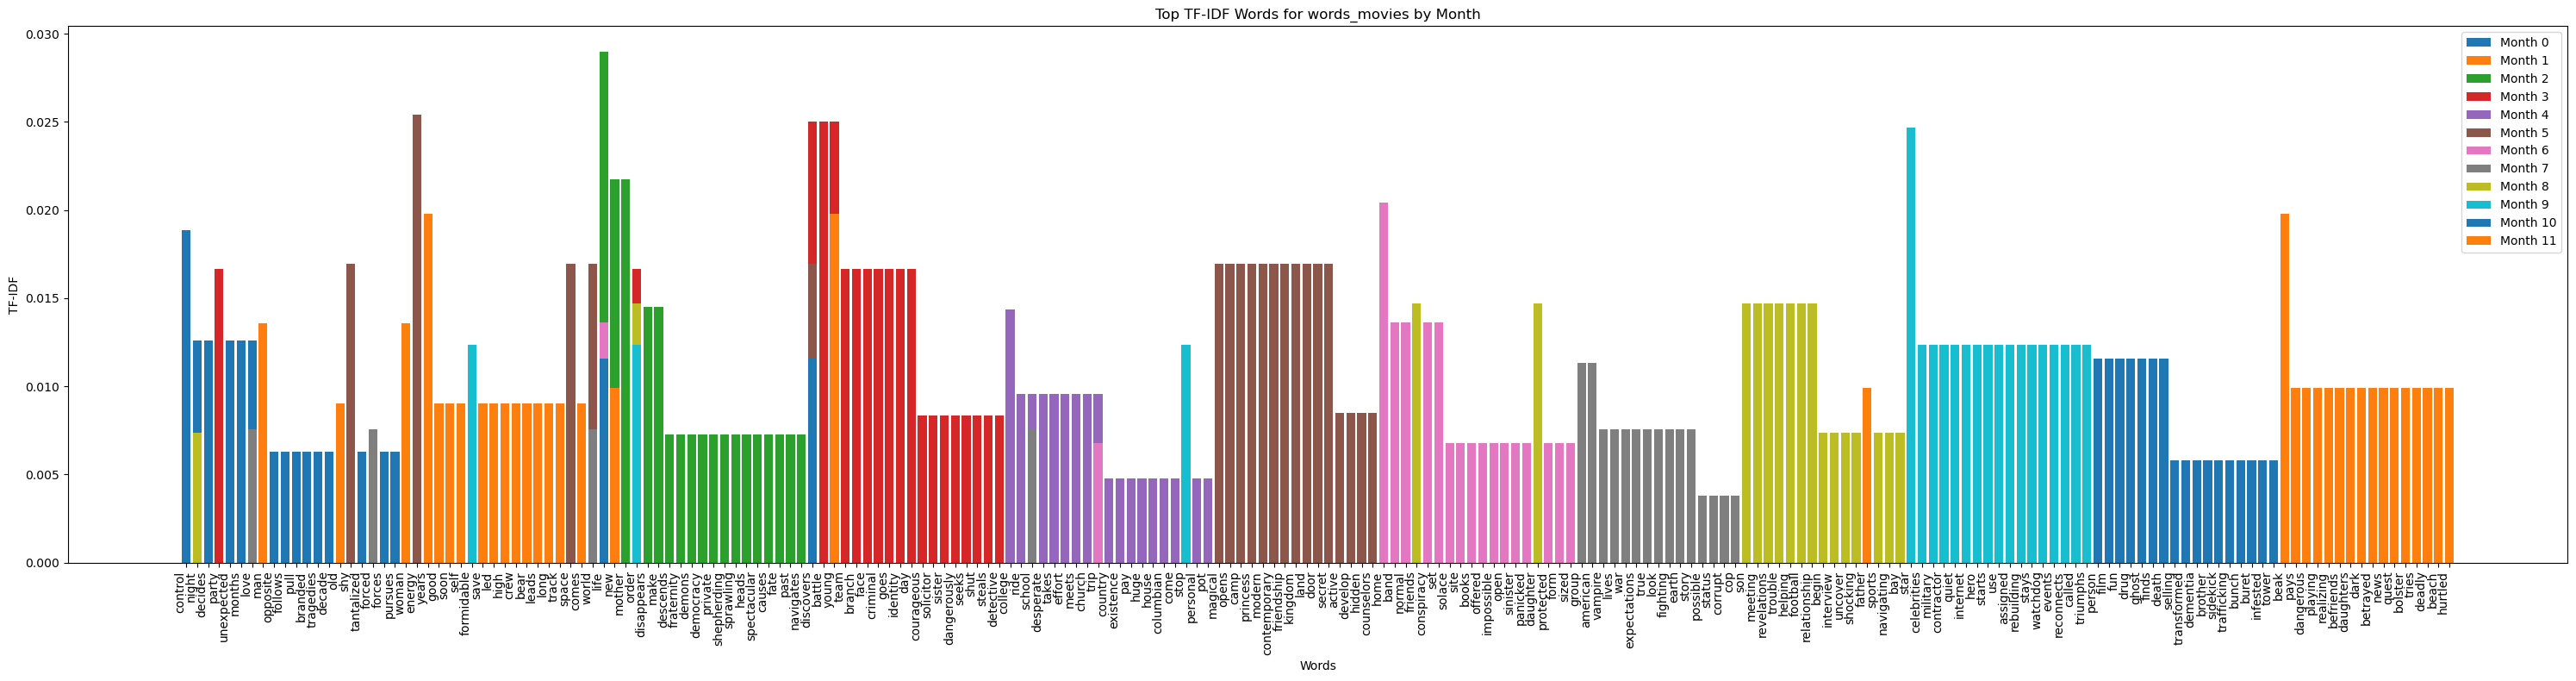

In [75]:
 from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'words_movies' and 'month' columns

# Tokenize and count words for 'words_movies'
vectorizer = CountVectorizer(stop_words='english')
X_words_movies = vectorizer.fit_transform(df['words_movies'])
word_counts_news = pd.DataFrame(X_words_movies.toarray(), columns=vectorizer.get_feature_names_out())
word_counts_news['month'] = df['month']  # Assuming 'month' is already present

# Aggregate counts on a monthly basis
monthly_word_counts_news = word_counts_news.groupby('month').sum()

# Identify seasonal words using TF-IDF
# You can adjust this based on your specific requirements and analysis goals
tfidf_news = (monthly_word_counts_news.T / monthly_word_counts_news.sum(axis=1)).T

# Identify the top TF-IDF words for each month
top_tfidf_words_per_month_news = {}
for month in tfidf_news.index:
    top_tfidf_words_per_month_news[month] = tfidf_news.loc[month].sort_values(ascending=False).index[:20]

# Convert month names to numerical values
month_numeric = {month: i for i, month in enumerate(tfidf_news.index)}

# Visualize the monthly TF-IDF values with a bar plot
fig, ax = plt.subplots(figsize=(30, 8))

for month in tfidf_news.index:
    words = top_tfidf_words_per_month_news[month]
    tfidf_values = tfidf_news.loc[month, words]
    ax.bar(words, tfidf_values, label=f'Month {month_numeric[month]}')

ax.set_title('Top TF-IDF Words for words_movies by Month')
ax.set_xlabel('Words')
ax.set_ylabel('TF-IDF')
ax.legend()
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()
